### What is Correlation and why it is important?

Correlation is a statistical measure that describes the degree to which two variables change together. In other words, it quantifies the relationship between two sets of data, indicating whether and how they tend to move in relation to each other.
* Positive Correlation:
  A positive correlation exists when an increase in one variable is associated with an increase in another variable.
* Negative Correlation:
    A negative correlation occurs when an increase in one variable is associated with a decrease in another variable.

It helps in identifying relationship between the variables and for feature selection in machine learning tasks. Highly correlated features may provide redundant information, and removing or combining them can improve model performance and interpretability.

### how they help for speech processing task?
* Pitch Detection and Estimation:
    - Pitch detection involves identifying the fundamental frequency of speech, which is crucial for tasks like prosody analysis. Cross-correlation can be employed to estimate pitch by finding periodicities in the speech signal.
    Application: Cross-correlation-based pitch detection is widely used in speech processing for applications such as intonation analysis and emotion recognition.

* Pattern Matching in Speech Recognition:
    - Cross-correlation is used in pattern matching to compare a template (e.g., a phoneme model) with different segments of the input signal.
    Application: Speech recognition systems often employ cross-correlation to align templates with input features, helping to identify and recognize phonemes and words.

* Speaker Recognition:

    - Speaker recognition systems aim to identify or verify the identity of a speaker. Cross-correlation is used to compare speech features extracted from an input signal with speaker models in the system.
    Application: Cross-correlation helps determine the similarity between the input speech and stored speaker models, aiding in speaker identification or verification.

* Speech Enhancement:
    - In noisy environments, speech enhancement techniques aim to improve the quality of speech signals. Cross-correlation can be used to estimate the noise level and adaptively filter out noise.
    Application: Cross-correlation helps in modeling the relationship between clean speech and noisy signals, allowing for the design of effective noise reduction algorithms

In [4]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [5]:
audio1= '../dataset1/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav'
audio2 = '../dataset1/discomfort/10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav'

signal1,rate1 = librosa.load(audio1)
signal2,rate2= librosa.load(audio2)

# Ensure both signals have the same length
min_len = min(len(signal1), len(signal2))
signal1 = signal1[:min_len]
signal2 = signal2[:min_len]


In [6]:
correlation = np.correlate(signal1, signal2, mode='full')
# Time lags corresponding to the correlation values
lags = np.arange(-min_len + 1, min_len)

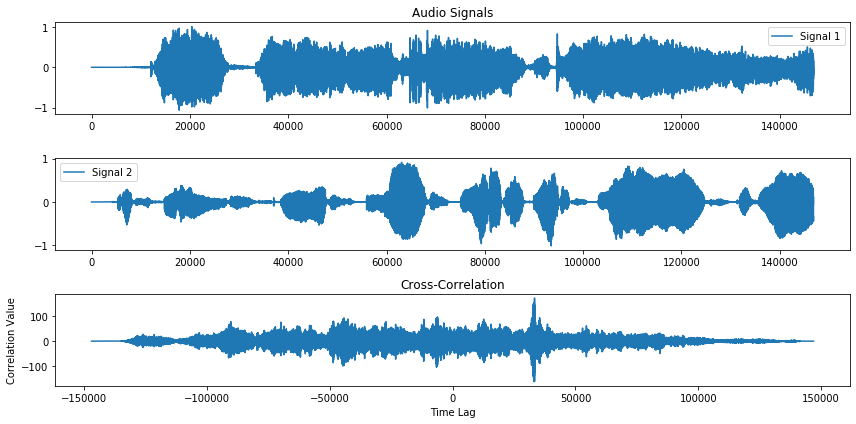

In [7]:
# Plot the signals
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(signal1, label='Signal 1')
plt.legend()
plt.title('Audio Signals')

plt.subplot(3, 1, 2)
plt.plot(signal2, label='Signal 2')
plt.legend()

# Plot the cross-correlation
plt.subplot(3, 1, 3)
plt.plot(lags, correlation)
plt.title('Cross-Correlation')
plt.xlabel('Time Lag')
plt.ylabel('Correlation Value')

plt.tight_layout()
plt.show()

* Audio Signal 1:
    This plot shows how the amplitude of the signal changes over time. Peaks and valleys in the waveform correspond to variations in the audio signal.

* Audio Signal 2:
    The second subplot (plt.subplot(3, 1, 2)) displays the waveform of the second audio signal (signal2). Similar to the first subplot, this plot shows the amplitude variations of the second audio signal over time.

* Cross-Correlation:
    The third subplot (plt.subplot(3, 1, 3)) displays the cross-correlation between the two audio signals. The x-axis represents the time lag between the signals, and the y-axis represents the correlation value. Peaks in the cross-correlation plot indicate instances where the two signals exhibit similar patterns.
    If there is a strong correlation at a specific time lag, it suggests that the corresponding segments in the two signals are similar or have a consistent relationship. For example, if the cross-correlation has a peak at a time lag of 0, it indicates a strong correlation between the signals without any time delay.

### What is Dynamic Time Warping(DTW) and why it is important?

Dynamic Time Warping (DTW) is a technique used to measure the similarity between two time-series sequences, even when they may have different lengths or exhibit temporal distortions. DTW is particularly valuable in speech processing tasks where aligning and comparing speech signals with different speaking rates, durations, or variations is essential.DTW aims to find an optimal alignment between two sequences by warping time, allowing for local time-scale adjustments.

- Key Characteristics:
    Unlike traditional measures like Euclidean distance, DTW considers the temporal structure and allows for stretching or compressing segments of the sequences to find the best match.

- Process:
    DTW creates a grid where each element represents the cost of aligning corresponding points in the two sequences. The goal is to find the path through this grid with the minimum cumulative cost.

- Algorithm:
    The dynamic programming algorithm is commonly used to efficiently find the optimal alignment path and calculate the overall cost.

For a project like CrySense, where the goal is to detect and analyze cry sounds, Dynamic Time Warping (DTW) can be a valuable tool for aligning and comparing cry sound sequences. DTW can help handle variations in the duration, intensity, and temporal structure of cry sounds, making it robust in scenarios where the crying patterns may vary among different individuals or even within the same individual over time.

/home/onkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/onkar/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


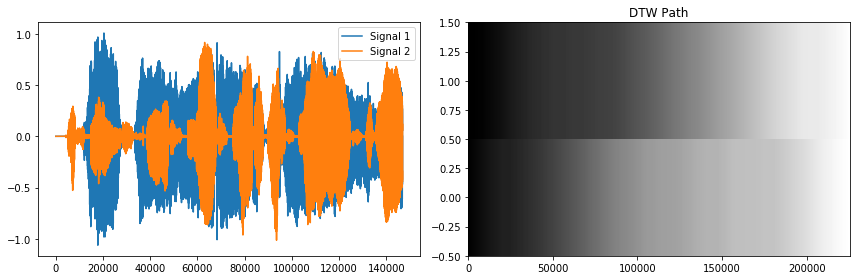

DTW Distance: 26583.645718719094


In [9]:
from fastdtw import fastdtw

# Perform dynamic time warping
distance, path = fastdtw(signal1, signal2)

# Plot signals and DTW alignment
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(signal1, label='Signal 1')
plt.plot(signal2, label='Signal 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(np.array(path).T, aspect='auto', origin='lower', cmap='gray')
plt.title('DTW Path')

plt.tight_layout()
plt.show()

print(f"DTW Distance: {distance}")

In [2]:
!pip install fastdtw

  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp37-cp37m-linux_x86_64.whl size=391137 sha256=17ffa3fd1d27e66b3f7a7c66ca5809d2db78b6de1df24d8659dc8a900ee5d55c
  Stored in directory: /home/onkar/.cache/pip/wheels/a2/da/8c/2d1b9b233595056f05e59156bb555f7277b88beb385605de16
Successfully built fastdtw


The DTW Distance of 26583.645718719094 indicates the dissimilarity or cost between the two cry sound sequences that were compared using Dynamic Time Warping (DTW). In the context of DTW:
- Smaller Distance:
  A smaller DTW distance suggests a higher similarity between the two sequences. Lower distances indicate that the sequences can be optimally aligned with relatively fewer adjustments or distortions.
- Larger Distance:
  A larger DTW distance indicates a greater dissimilarity between the sequences. Larger distances suggest that the sequences require more adjustments or warping to align, and they exhibit significant differences.